# importing libraries

In [1]:
import numpy as np
import pandas as pd

# Loading the dataset

In [2]:
dataset=pd.read_csv(r"C:\Users\kotha\Downloads\VISA.csv")

In [3]:
dataset.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016,"PLANO, TEXAS",-96.698886,33.019843
2,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016,"DENVER, COLORADO",-104.990251,39.739236
4,CERTIFIED-WITHDRAWN,BURGER KING CORPORATION,CHIEF EXECUTIVES,"EXECUTIVE V P, GLOBAL DEVELOPMENT AND PRESIDEN...",Y,225000.0,2016,"MIAMI, FLORIDA",-80.191790,25.761680


In [4]:
dataset.isnull().any()

CASE_STATUS           False
EMPLOYER_NAME         False
SOC_NAME              False
JOB_TITLE             False
FULL_TIME_POSITION    False
PREVAILING_WAGE       False
YEAR                  False
WORKSITE              False
lon                    True
lat                    True
dtype: bool

In [5]:
# Dropping lat and lon columns
dataset = dataset.drop('lat', axis = 1)
dataset = dataset.drop('lon', axis = 1)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1619 entries, 0 to 1618
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CASE_STATUS         1619 non-null   object 
 1   EMPLOYER_NAME       1619 non-null   object 
 2   SOC_NAME            1619 non-null   object 
 3   JOB_TITLE           1619 non-null   object 
 4   FULL_TIME_POSITION  1619 non-null   object 
 5   PREVAILING_WAGE     1619 non-null   float64
 6   YEAR                1619 non-null   int64  
 7   WORKSITE            1619 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 101.3+ KB


In [7]:
dataset.describe()

,PREVAILING_WAGE,YEAR
count,1.619000e+03,1619.0
mean,4.902225e+05,2016.0
std,1.040947e+07,0.0
min,1.200000e+04,2016.0
25%,7.440200e+04,2016.0
50%,1.130900e+05,2016.0
75%,1.640500e+05,2016.0
max,3.291392e+08,2016.0


# Plotting

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

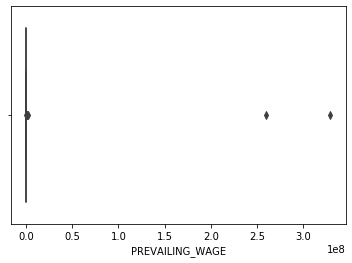

In [9]:
sns.boxplot(dataset['PREVAILING_WAGE'])

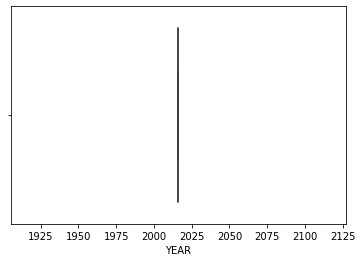

In [10]:
sns.boxplot(dataset["YEAR"])

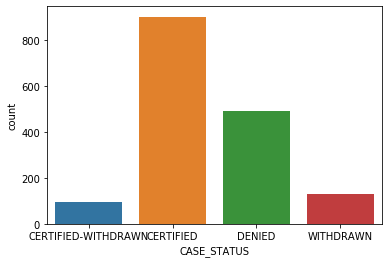

In [11]:
sns.countplot(x="CASE_STATUS",data=dataset)

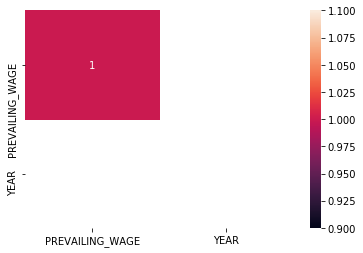

In [12]:
sns.heatmap(dataset.corr(),annot=True)

# Feature creation and Data pre-processing

In [13]:
dataset['CASE_STATUS'].unique()

array(['CERTIFIED-WITHDRAWN', 'CERTIFIED', 'DENIED', 'WITHDRAWN'],
      dtype=object)

In [14]:
import warnings
warnings.filterwarnings("ignore")
dataset.CASE_STATUS[dataset['CASE_STATUS']=='CERTIFIED-WITHDRAWN'] = 'CERTIFIED'
dataset.CASE_STATUS[dataset['CASE_STATUS']=='WITHDRAWN'] = 'DENIED'

In [15]:
dataset['CASE_STATUS'].unique()

array(['CERTIFIED', 'DENIED'], dtype=object)

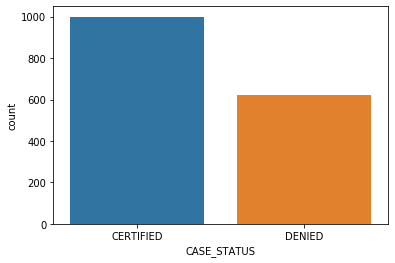

In [16]:
sns.countplot(x="CASE_STATUS",data=dataset)

In [17]:
dataset['SOC_NAME'].value_counts()

GENERAL AND OPERATIONS MANAGERS                       628
CHIEF EXECUTIVES                                      590
COMPUTER AND INFORMATION SYSTEMS MANAGERS             130
MARKETING MANAGERS                                     86
FINANCIAL MANAGERS                                     49
SALES MANAGERS                                         30
ADVERTISING AND PROMOTIONS MANAGERS                    28
ADMINISTRATIVE SERVICES MANAGERS                       23
INDUSTRIAL PRODUCTION MANAGERS                         22
TRANSPORTATION, STORAGE, AND DISTRIBUTION MANAGERS     12
PURCHASING MANAGERS                                     8
PUBLIC RELATIONS AND FUNDRAISING MANAGERS               8
GENERAL AND OPERATIONS MANAGER                          2
QUALITY CONTROL SYSTEMS MANAGERS                        1
COMPUTERS MANAGERS                                      1
BIOCHEMISTS AND BIOPHYSICISTS                           1
Name: SOC_NAME, dtype: int64

In [18]:
print(dataset['CASE_STATUS'].value_counts())

CERTIFIED    999
DENIED       620
Name: CASE_STATUS, dtype: int64


In [21]:
##to check the percentile in wages
print(np.nanpercentile(dataset.PREVAILING_WAGE,98))

253635.12800000003


In [22]:
## replacing min and max with 2 and 98 percentile
dataset.loc[dataset.PREVAILING_WAGE < 34029, 'PREVAILING_WAGE']= 34029
dataset.loc[dataset['PREVAILING_WAGE'] > 138703, 'PREVAILING_WAGE']= 138703
dataset.PREVAILING_WAGE.fillna(dataset.PREVAILING_WAGE.mean(), inplace = True)

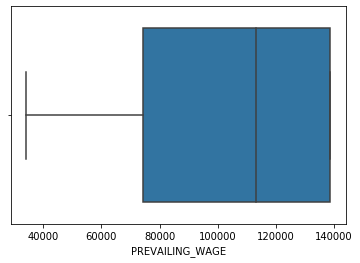

In [23]:
sns.boxplot(dataset['PREVAILING_WAGE'])

In [24]:
dataset.head(4)

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE
0,CERTIFIED,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016,"ANN ARBOR, MICHIGAN"
1,CERTIFIED,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,138703.0,2016,"PLANO, TEXAS"
2,CERTIFIED,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,138703.0,2016,"JERSEY CITY, NEW JERSEY"
3,CERTIFIED,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,138703.0,2016,"DENVER, COLORADO"


In [25]:
dataset['NEW_EMPLOYER'] = np.nan
dataset.shape

(1619, 9)

In [26]:
dataset['EMPLOYER_NAME'] = dataset['EMPLOYER_NAME'].str.lower()
dataset.NEW_EMPLOYER[dataset['EMPLOYER_NAME'].str.contains('university')] = 'university'
dataset['NEW_EMPLOYER']= dataset.NEW_EMPLOYER.replace(np.nan, 'non university', regex=True)

In [27]:
# Creating occupation and mapping the values
warnings.filterwarnings("ignore")

dataset['OCCUPATION'] = np.nan
dataset['SOC_NAME'] = dataset['SOC_NAME'].str.lower()
dataset.OCCUPATION[dataset['SOC_NAME'].str.contains('computer','programmer')] = 'computer occupations'
dataset.OCCUPATION[dataset['SOC_NAME'].str.contains('software','web developer')] = 'computer occupations'
dataset.OCCUPATION[dataset['SOC_NAME'].str.contains('database')] = 'computer occupations'
dataset.OCCUPATION[dataset['SOC_NAME'].str.contains('math','statistic')] = 'Mathematical Occupations'
dataset.OCCUPATION[dataset['SOC_NAME'].str.contains('predictive model','stats')] = 'Mathematical Occupations'
dataset.OCCUPATION[dataset['SOC_NAME'].str.contains('teacher','linguist')] = 'Education Occupations'
dataset.OCCUPATION[dataset['SOC_NAME'].str.contains('professor','Teach')] = 'Education Occupations'
dataset.OCCUPATION[dataset['SOC_NAME'].str.contains('school principal')] = 'Education Occupations'
dataset.OCCUPATION[dataset['SOC_NAME'].str.contains('medical','doctor')] = 'Medical Occupations'
dataset.OCCUPATION[dataset['SOC_NAME'].str.contains('physician','dentist')] = 'Medical Occupations'
dataset.OCCUPATION[dataset['SOC_NAME'].str.contains('Health','Physical Therapists')] = 'Medical Occupations'
dataset.OCCUPATION[dataset['SOC_NAME'].str.contains('surgeon','nurse')] = 'Medical Occupations'
dataset.OCCUPATION[dataset['SOC_NAME'].str.contains('psychiatr')] = 'Medical Occupations'
dataset.OCCUPATION[dataset['SOC_NAME'].str.contains('chemist','physicist')] = 'Advance Sciences'
dataset.OCCUPATION[dataset['SOC_NAME'].str.contains('biology','scientist')] = 'Advance Sciences'
dataset.OCCUPATION[dataset['SOC_NAME'].str.contains('biologi','clinical research')] = 'Advance Sciences'
dataset.OCCUPATION[dataset['SOC_NAME'].str.contains('public relation','manage')] = 'Management Occupation'
dataset.OCCUPATION[dataset['SOC_NAME'].str.contains('management','operation')] = 'Management Occupation'
dataset.OCCUPATION[dataset['SOC_NAME'].str.contains('chief','plan')] = 'Management Occupation'
dataset.OCCUPATION[dataset['SOC_NAME'].str.contains('executive')] = 'Management Occupation'
dataset.OCCUPATION[dataset['SOC_NAME'].str.contains('advertis','marketing')] = 'Marketing Occupation'
dataset.OCCUPATION[dataset['SOC_NAME'].str.contains('promotion','market research')] = 'Marketing Occupation'
dataset.OCCUPATION[dataset['SOC_NAME'].str.contains('business','business analyst')] = 'Business Occupation'
dataset.OCCUPATION[dataset['SOC_NAME'].str.contains('business systems analyst')] = 'Business Occupation'
dataset.OCCUPATION[dataset['SOC_NAME'].str.contains('accountant','finance')] = 'Financial Occupation'
dataset.OCCUPATION[dataset['SOC_NAME'].str.contains('financial')] = 'Financial Occupation'
dataset.OCCUPATION[dataset['SOC_NAME'].str.contains('engineer','architect')] = 'Architecture & Engineering'
dataset.OCCUPATION[dataset['SOC_NAME'].str.contains('surveyor','carto')] = 'Architecture & Engineering'
dataset.OCCUPATION[dataset['SOC_NAME'].str.contains('technician','drafter')] = 'Architecture & Engineering'
dataset.OCCUPATION[dataset['SOC_NAME'].str.contains('information security','information tech')] = 'Architecture & Engineering'
dataset['OCCUPATION']= dataset.OCCUPATION.replace(np.nan, 'Others', regex=True)

In [28]:
## Splitting city and state and capturing state in another variable
dataset['state'] = dataset.WORKSITE.str.split('\s+').str[-1]

In [29]:
from sklearn import preprocessing
class_mapping = {'CERTIFIED':0, 'DENIED':1}
dataset["CASE_STATUS"] = dataset["CASE_STATUS"].map(class_mapping)

In [30]:
dataset.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,NEW_EMPLOYER,OCCUPATION,state
0,0,university of michigan,biochemists and biophysicists,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016,"ANN ARBOR, MICHIGAN",university,Advance Sciences,MICHIGAN
1,0,"goodman networks, inc.",chief executives,CHIEF OPERATING OFFICER,Y,138703.0,2016,"PLANO, TEXAS",non university,Management Occupation,TEXAS
2,0,"ports america group, inc.",chief executives,CHIEF PROCESS OFFICER,Y,138703.0,2016,"JERSEY CITY, NEW JERSEY",non university,Management Occupation,JERSEY
3,0,"gates corporation, a wholly-owned subsidiary o...",chief executives,"REGIONAL PRESIDEN, AMERICAS",Y,138703.0,2016,"DENVER, COLORADO",non university,Management Occupation,COLORADO
4,0,burger king corporation,chief executives,"EXECUTIVE V P, GLOBAL DEVELOPMENT AND PRESIDEN...",Y,138703.0,2016,"MIAMI, FLORIDA",non university,Management Occupation,FLORIDA


In [31]:
# dropping these columns
dataset = dataset.drop('EMPLOYER_NAME',axis=1)
dataset = dataset.drop('SOC_NAME', axis = 1)
dataset = dataset.drop('JOB_TITLE', axis = 1)
dataset = dataset.drop('WORKSITE', axis = 1)

In [32]:
dataset.head()

,CASE_STATUS,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,NEW_EMPLOYER,OCCUPATION,state
0,0,N,36067.0,2016,university,Advance Sciences,MICHIGAN
1,0,Y,138703.0,2016,non university,Management Occupation,TEXAS
2,0,Y,138703.0,2016,non university,Management Occupation,JERSEY
3,0,Y,138703.0,2016,non university,Management Occupation,COLORADO
4,0,Y,138703.0,2016,non university,Management Occupation,FLORIDA


In [33]:
dataset['NEW_EMPLOYER'].unique()

array(['university', 'non university'], dtype=object)

In [34]:
dataset['OCCUPATION'].value_counts()

Others                   812
Management Occupation    598
computer occupations     131
Financial Occupation      49
Marketing Occupation      28
Advance Sciences           1
Name: OCCUPATION, dtype: int64

In [35]:
dataset['state'].value_counts()

CALIFORNIA       384
YORK             212
FLORIDA          133
TEXAS            121
ILLINOIS          88
MASSACHUSETTS     58
GEORGIA           49
JERSEY            45
CAROLINA          41
WASHINGTON        37
COLORADO          31
PENNSYLVANIA      29
UTAH              29
COLUMBIA          28
MICHIGAN          28
NEVADA            26
VIRGINIA          25
OHIO              23
CONNECTICUT       22
NA                21
ARIZONA           19
MARYLAND          17
TENNESSEE         14
MINNESOTA         13
INDIANA           11
HAWAII            10
KENTUCKY          10
OREGON            10
ARKANSAS           9
WISCONSIN          9
MISSOURI           9
LOUISIANA          8
OKLAHOMA           6
KANSAS             6
IOWA               5
MAINE              4
MISSISSIPPI        4
RICO               4
NEBRASKA           3
ISLAND             3
VERMONT            3
DELAWARE           3
ALASKA             2
HAMPSHIRE          2
WYOMING            2
ALABAMA            1
IDAHO              1
MEXICO       

In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['NEW_EMPLOYER'] = le.fit_transform(dataset['NEW_EMPLOYER'] )
dataset['OCCUPATION'] = le.fit_transform(dataset['OCCUPATION'] )
dataset['state'] = le.fit_transform(dataset['state'] )
dataset['FULL_TIME_POSITION'] = le.fit_transform(dataset['FULL_TIME_POSITION'] )

In [37]:
dataset

,CASE_STATUS,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,NEW_EMPLOYER,OCCUPATION,state
0,0,0,36067.0,2016,1,0,27
1,0,1,138703.0,2016,0,2,40
2,0,1,138703.0,2016,0,2,19
3,0,1,138703.0,2016,0,2,6
4,0,1,138703.0,2016,0,2,10
...,...,...,...,...,...,...,...
1614,1,0,45500.0,2016,0,4,40
1615,1,0,53331.0,2016,0,4,25
1616,1,0,53331.0,2016,0,4,25
1617,1,0,64563.0,2016,0,4,15


In [38]:
x=dataset.iloc[:,1:7].values
x

array([[0.00000e+00, 3.60670e+04, 2.01600e+03, 1.00000e+00, 0.00000e+00,
        2.70000e+01],
       [1.00000e+00, 1.38703e+05, 2.01600e+03, 0.00000e+00, 2.00000e+00,
        4.00000e+01],
       [1.00000e+00, 1.38703e+05, 2.01600e+03, 0.00000e+00, 2.00000e+00,
        1.90000e+01],
       ...,
       [0.00000e+00, 5.33310e+04, 2.01600e+03, 0.00000e+00, 4.00000e+00,
        2.50000e+01],
       [0.00000e+00, 6.45630e+04, 2.01600e+03, 0.00000e+00, 4.00000e+00,
        1.50000e+01],
       [1.00000e+00, 9.54100e+04, 2.01600e+03, 0.00000e+00, 4.00000e+00,
        4.00000e+00]])

In [39]:
y=dataset.iloc[:,0:1].values
y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [41]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1619 entries, 0 to 1618
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CASE_STATUS         1619 non-null   int64  
 1   FULL_TIME_POSITION  1619 non-null   int32  
 2   PREVAILING_WAGE     1619 non-null   float64
 3   YEAR                1619 non-null   int64  
 4   NEW_EMPLOYER        1619 non-null   int32  
 5   OCCUPATION          1619 non-null   int32  
 6   state               1619 non-null   int32  
dtypes: float64(1), int32(4), int64(2)
memory usage: 63.4 KB


# Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
lpred=logistic.predict(x_test)

In [44]:
lpred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [45]:
y_test

array([[1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
    

In [46]:
from sklearn.metrics import accuracy_score
laccuracy=accuracy_score(y_test,lpred)

In [47]:
laccuracy

0.6049382716049383

In [48]:
from sklearn.metrics import confusion_matrix
lcm=confusion_matrix(y_test,lpred)

In [49]:
lcm

array([[179,  17],
       [111,  17]], dtype=int64)

In [50]:
x_test.shape

(324, 6)

In [51]:
import sklearn.metrics as metrics
lfpr,ltpr,lthreshold=metrics.roc_curve(y_test,lpred)
lroc_auc=metrics.auc(lfpr,ltpr)

In [52]:
lroc_auc

0.5230389030612245

In [53]:
lp=logistic.predict([[0,36067.0,2016,1,0,27]])

In [54]:
lp

array([1], dtype=int64)

# KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,p=2)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [56]:
kpred=knn.predict(x_test)

In [57]:
kpred

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,

In [58]:
y_test

array([[1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
    

In [59]:
from sklearn.metrics import accuracy_score
kaccuracy=accuracy_score(y_test,kpred)

In [60]:
kaccuracy

0.6358024691358025

In [61]:
from sklearn.metrics import confusion_matrix
kcm=confusion_matrix(y_test,kpred)

In [62]:
kcm

array([[162,  34],
       [ 84,  44]], dtype=int64)

In [63]:
import sklearn.metrics as metrics
kfpr,ktpr,kthreshold=metrics.roc_curve(y_test,kpred)
kroc_auc=metrics.auc(kfpr,ktpr)

In [64]:
kroc_auc

0.5851403061224489

Text(0.5, 0, 'false positive rate')

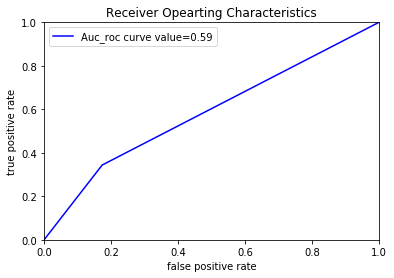

In [65]:
import matplotlib.pyplot as plt
plt.title("Receiver Opearting Characteristics")
plt.plot(kfpr,ktpr,color="blue",label='Auc_roc curve value=%0.2f'%kroc_auc)
plt.legend()
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("true positive rate")
plt.xlabel("false positive rate")

In [66]:
kp=knn.predict([[0,36067.0,2016,1,0,27]])

In [67]:
kp

array([0], dtype=int64)

# DecisionTree

In [68]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy',splitter='best')

In [69]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [70]:
dpred=dt.predict(x_test)

In [71]:
dpred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,

In [72]:
y_test

array([[1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
    

In [73]:
from sklearn.metrics import accuracy_score
daccuracy=accuracy_score(y_test,dpred)

In [74]:
daccuracy

0.7530864197530864

In [75]:
from sklearn.metrics import confusion_matrix
dcm=confusion_matrix(y_test,dpred)

In [76]:
dcm

array([[175,  21],
       [ 59,  69]], dtype=int64)

In [77]:
import sklearn.metrics as metrics
dfpr,dtpr,dthreshold=metrics.roc_curve(y_test,dpred)
droc_auc=metrics.auc(dfpr,dtpr)

In [78]:
droc_auc

0.7159598214285714

Text(0.5, 0, 'false positive rate')

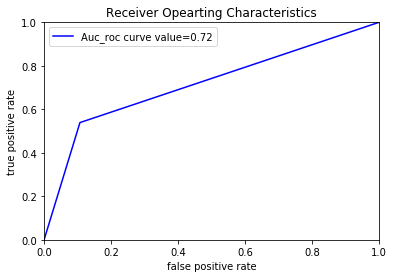

In [79]:
import matplotlib.pyplot as plt
plt.title("Receiver Opearting Characteristics")
plt.plot(dfpr,dtpr,color="blue",label='Auc_roc curve value=%0.2f'%droc_auc)
plt.legend()
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("true positive rate")
plt.xlabel("false positive rate")

In [80]:
index=["Certified","Denied"]

In [81]:
pred=dt.predict([[1,138703.0,2016,0,2,40]])

In [82]:
pred

array([0], dtype=int64)

In [83]:
p=pred[0]

In [84]:
print(index[p])

Certified


In [85]:
pred=dt.predict([[0,45500.0,2016,0,4,4]])

In [86]:
pred

array([1], dtype=int64)

In [87]:
p=pred[0]

In [88]:
print(index[p])

Denied


In [89]:
pred=dt.predict([[0,36067.0,2016,1,0,27]])

In [90]:
pred

array([0], dtype=int64)

In [91]:
p=pred[0]

In [92]:
print(index[p])

Certified


# Naive Bayes

In [93]:
from sklearn.naive_bayes import GaussianNB
naive=GaussianNB()
naive.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [94]:
npred=naive.predict(x_test)

In [95]:
npred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [96]:
y_test

array([[1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
    

In [97]:
naccuracy=accuracy_score(y_test,npred)

In [98]:
naccuracy

0.6265432098765432

In [99]:
ncm=confusion_matrix(y_test,npred)

In [100]:
ncm

array([[161,  35],
       [ 86,  42]], dtype=int64)

In [101]:
import sklearn.metrics as metrics
nfpr,ntpr,nthreshold=metrics.roc_curve(y_test,npred)
nroc_auc=metrics.auc(nfpr,ntpr)

In [102]:
nroc_auc

0.5747767857142857

Text(0.5, 0, 'false positive rate')

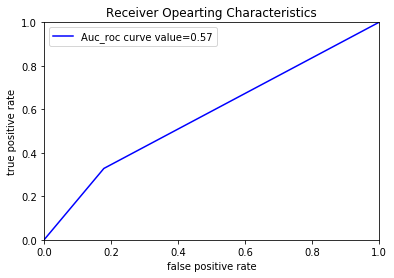

In [103]:
import matplotlib.pyplot as plt
plt.title("Receiver Opearting Characteristics")
plt.plot(nfpr,ntpr,color="blue",label='Auc_roc curve value=%0.2f'%nroc_auc)
plt.legend()
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("true positive rate")
plt.xlabel("false positive rate")

In [104]:
np=naive.predict([[1,138703.0,2016,0,7,26]])

In [105]:
np

array([1], dtype=int64)

# RandomForest

In [106]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators = 10,criterion = "entropy",random_state = 0 )
random.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [107]:
rpred = random.predict(x_test)

In [108]:
rpred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,

In [109]:
y_test

array([[1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
    

In [110]:
raccuracy=accuracy_score(y_test,rpred)

In [111]:
raccuracy

0.7469135802469136

In [112]:
rcm=confusion_matrix(y_test,rpred)

In [113]:
rcm

array([[179,  17],
       [ 65,  63]], dtype=int64)

In [114]:
import sklearn.metrics as metrics
rfpr,rtpr,rthreshold=metrics.roc_curve(y_test,rpred)
rroc_auc=metrics.auc(rfpr,rtpr)

In [115]:
rroc_auc

0.7027264030612245

Text(0.5, 0, 'false positive rate')

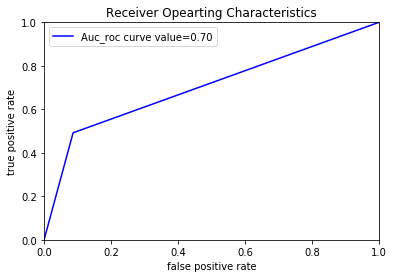

In [116]:
import matplotlib.pyplot as plt
plt.title("Receiver Opearting Characteristics")
plt.plot(rfpr,rtpr,color="blue",label='Auc_roc curve value=%0.2f'%rroc_auc)
plt.legend()
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("true positive rate")
plt.xlabel("false positive rate")

In [117]:
rp=random.predict([[1,138703.0,2016,0,7,26]])

In [118]:
rp

array([1], dtype=int64)

In [119]:
p=rp[0]

In [120]:
print(index[p])

Denied


In [121]:
rp=random.predict([[0,45500.0,2016,0,4,4]])

In [122]:
rp

array([0], dtype=int64)

In [123]:
print(index[p])

Denied


# SVM

In [124]:
from sklearn.svm import SVC
svm=SVC(kernel="linear")
svm.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [125]:
spred=svm.predict(x_test)

In [126]:
spred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [127]:
y_test

array([[1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
    

In [128]:
saccuracy=accuracy_score(y_test,spred)

In [129]:
saccuracy

0.6265432098765432

In [130]:
scm=confusion_matrix(y_test,spred)

In [131]:
scm

array([[176,  20],
       [101,  27]], dtype=int64)

In [132]:
import sklearn.metrics as metrics
sfpr ,stpr ,sthreshold = metrics.roc_curve(y_test,spred)
sroc_auc = metrics.auc(sfpr,stpr)

In [133]:
sroc_auc

0.5544483418367346

Text(0.5, 0, 'False possitive rate')

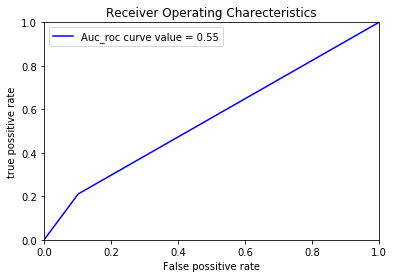

In [134]:
import matplotlib.pyplot as plt
plt.title("Receiver Operating Charecteristics")
plt.plot(sfpr,stpr, color = "blue",label = 'Auc_roc curve value = %0.2f'%sroc_auc)
plt.legend()
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("true possitive rate")
plt.xlabel("False possitive rate")

In [135]:
sp=svm.predict([[1,138703.0,2016,0,2,40]])

In [136]:
sp

array([0], dtype=int64)

In [137]:
p=rp[0]

In [138]:
print(index[p])

Certified


# pickle module

In [141]:
import pickle
pickle.dump(dt,open("_casestatus_.pkl","wb"))